Import Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from modules.data_filter import filter_data
from modules.visualizations import plot_custom_analysis,plot_grouped_averages
from modules.utils import get_user_choice
from modules.data_filter import filter_data,filter_by_internet_access

Hide unused log in console

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Data Import

In [ ]:
CSV_PATH = "data.csv"
data = pd.read_csv(CSV_PATH)

Basic Summery

In [4]:
data.head()
# data.columns

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,school_type,attendance,extra_curricular_activities,english,math,science,social_science,ict,finance,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Private,95,Yes,95,98,92,94,98,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,Semi_Govt,92,No,65,71,40,78,82,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Govt,81,Yes,64,78,58,86,96,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Private,90,Yes,84,90,85,86,43,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Semi_Govt,75,Yes,54,70,45,79,85,76,Commerce


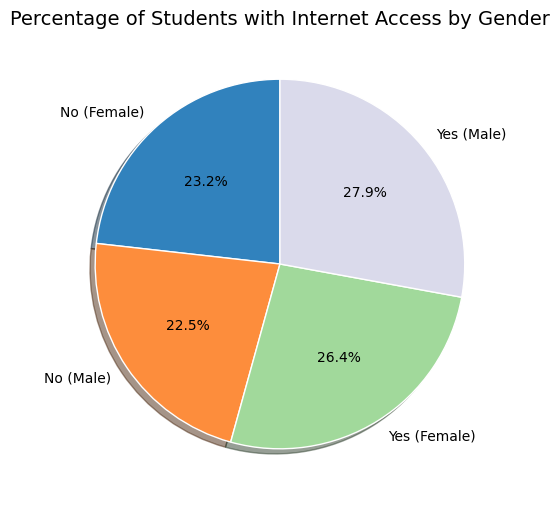

In [5]:
grouped_data = data.groupby(['internet_access', 'gender']).size().reset_index(name='count')
grouped_data['label'] = grouped_data['internet_access'] + ' (' + grouped_data['gender'] + ')'
sizes = grouped_data['count']
labels = grouped_data['label']
colors = cm.tab20c(np.arange(len(sizes)) / len(sizes))
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, wedgeprops=dict(edgecolor='w'))
plt.title('Percentage of Students with Internet Access by Gender', fontsize=14)
plt.show()


Students with Internet Access by Location

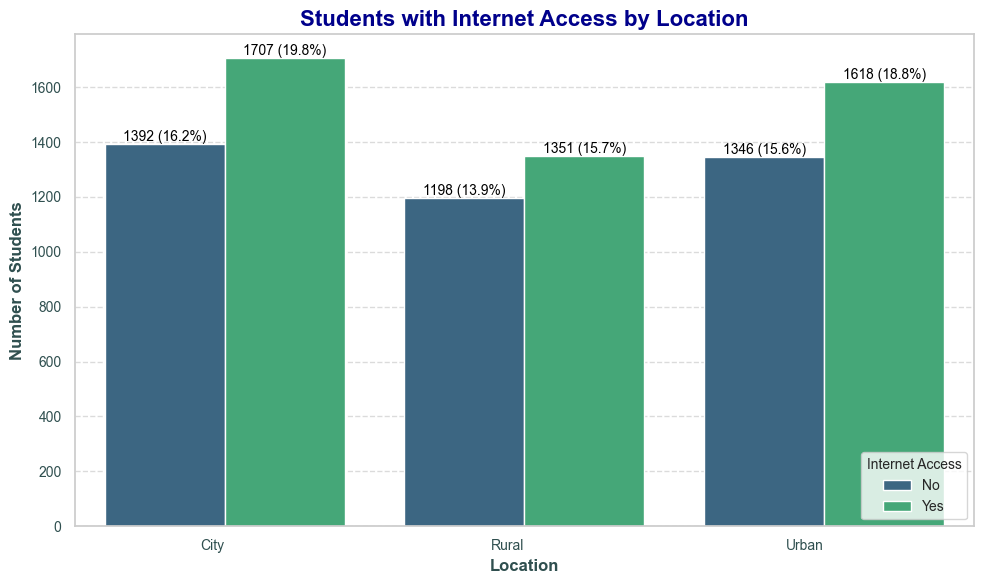

In [6]:
grouped_data = data.groupby(['internet_access', 'location']).size().reset_index(name='count')
total_counts = grouped_data.groupby('internet_access')['count'].transform('sum')
grouped_data['percentage'] = grouped_data['count'] / total_counts * 100
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='location', y='count', hue='internet_access', data=grouped_data, palette='viridis')
plt.title('Students with Internet Access by Location', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Location', fontsize=12, weight='bold', color='darkslategray')
plt.ylabel('Number of Students', fontsize=12, weight='bold', color='darkslategray')
ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0:
        height = p.get_height()
        percentage = (height / grouped_data['count'].sum()) * 100
        ax.annotate(f'{height:.0f} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
        
plt.xticks( ha='right', fontsize=10, weight='light', color='darkslategray')
plt.yticks(fontsize=10, weight='light', color='darkslategray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Internet Access', fontsize='small', title_fontsize='10', loc='lower right')
plt.tight_layout()
plt.show()


Relationship between internet access and extra curricular activities

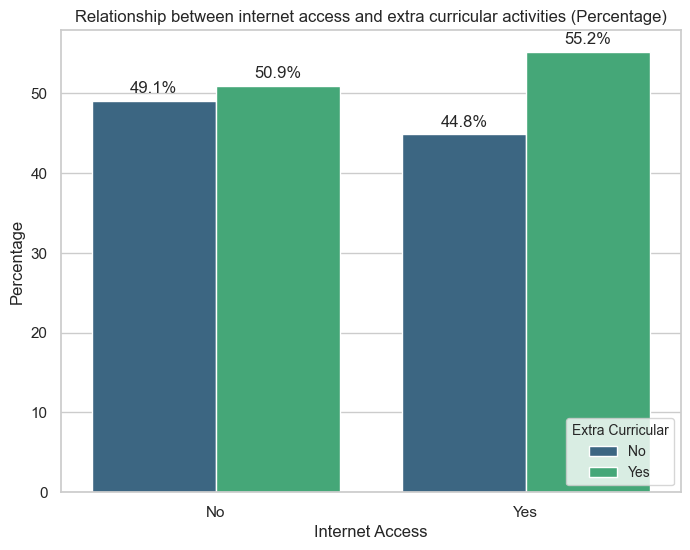

In [7]:
filtered_data = data.groupby(['internet_access', 'extra_curricular_activities']).size().reset_index(name='count')
total_counts = filtered_data.groupby('internet_access')['count'].transform('sum')
filtered_data['percentage'] = filtered_data['count'] / total_counts * 100
plt.figure(figsize=(8, 6))
sns.barplot(x='internet_access', y='percentage', hue='extra_curricular_activities', data=filtered_data, palette='viridis')
plt.title('Relationship between internet access and extra curricular activities (Percentage)')
ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, f'{p.get_height():.1f}%', ha='center')

plt.legend(title='Extra Curricular', fontsize='small', title_fontsize='10', loc='lower right')
plt.ylabel('Percentage')
plt.xlabel('Internet Access')
plt.show()

Main Function For dynamic user input

In [8]:
def main():
    try:
        data = pd.read_csv(CSV_PATH)
        main_menu = ["Custom Analysis", "All Analysis", "Exit"]
        while True:
            choice = get_user_choice("Main Menu:", main_menu)
            if choice == "Custom Analysis":
                filtered_data = filter_data(data)
                filtered_data = filter_by_internet_access(filtered_data)
                plot_custom_analysis(filtered_data)
            elif choice == "All Analysis":
                filtered_data = filter_data(data)
                filtered_data = filter_by_internet_access(filtered_data)
                plot_grouped_averages(filtered_data)
            elif choice == "Exit":
                print("Exiting the program.")
                break
    except FileNotFoundError:
        print("\nDataset file not found. Please ensure the file path is correct.")
    except Exception as e:
        print(f"\nAn error occurred: {e}")

if __name__ == "__main__":
    main()



Main Menu:
1. Custom Analysis
2. All Analysis
3. Exit
Invalid input. Please enter a number.

Main Menu:
1. Custom Analysis
2. All Analysis
3. Exit
Exiting the program.


-------------------------------------------------------------------------Others block----------------------------------------------------------------------

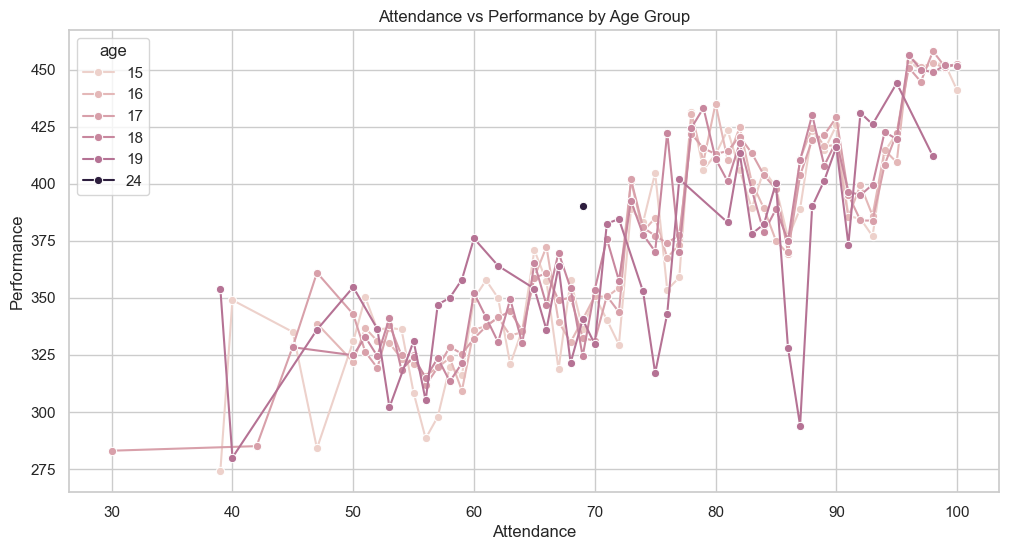

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from analytics import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set(style="whitegrid")


df = pd.read_csv("data.csv")
df['stu_group'] = df['stu_group'].str.capitalize()
df['location'] = df['location'].str.capitalize()
subjects = ['english', 'math', 'science', 'social_science', 'art_culture']
df['total_score'] = df[subjects].sum(axis=1)
df['average_score'] = df['total_score'] / len(subjects)
df['location'] = df['location'].str.capitalize()



# analyze_performance_by_demographics(df,subjects)
analysis_attendance_vs_performance(df)

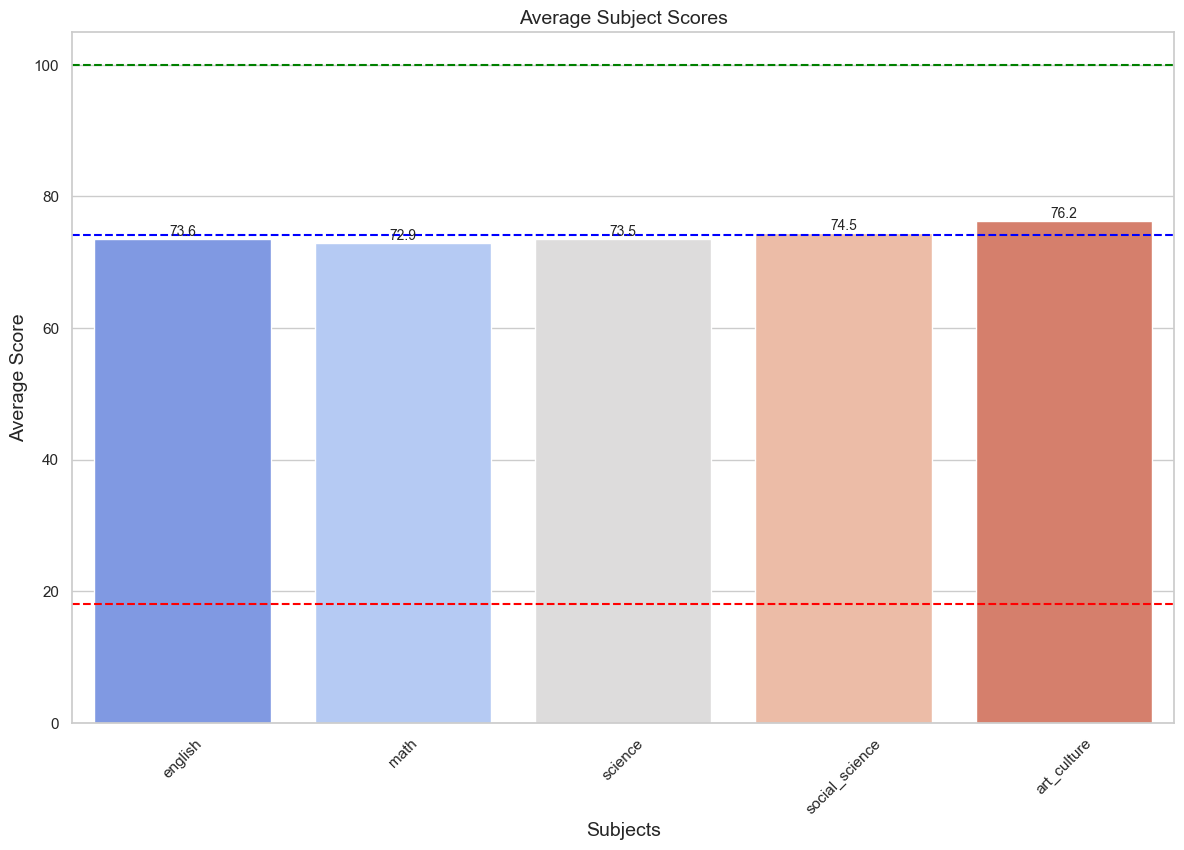

In [10]:
x = analyze_performance_by_demographics(df,subjects)

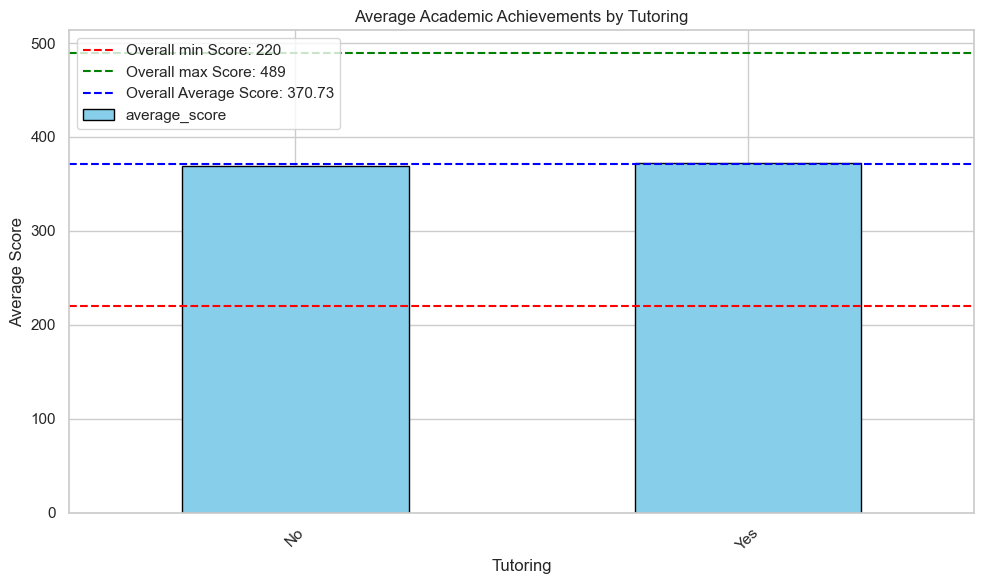

In [11]:
analyze_average_achievements(df,subjects,'tutoring', plot=True)

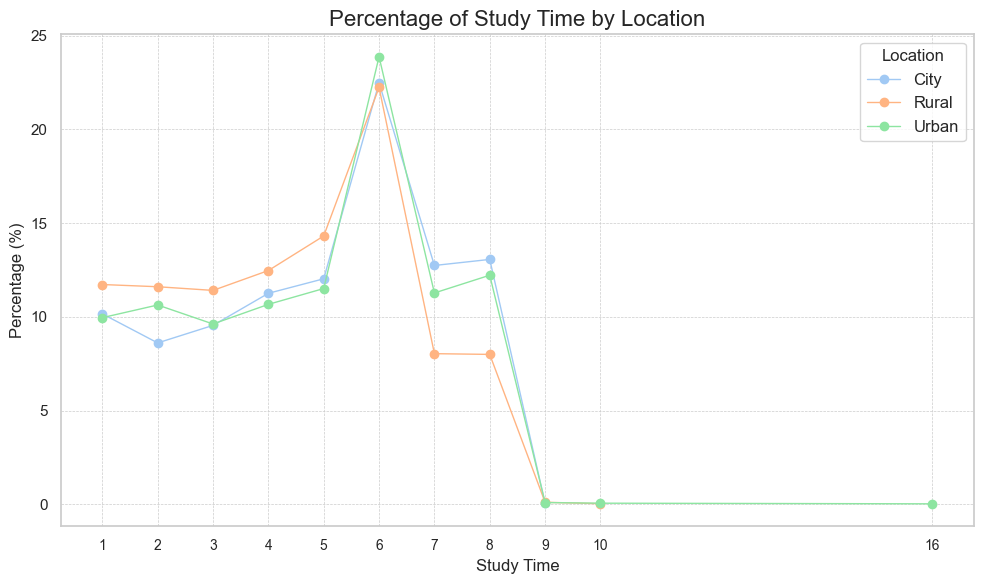

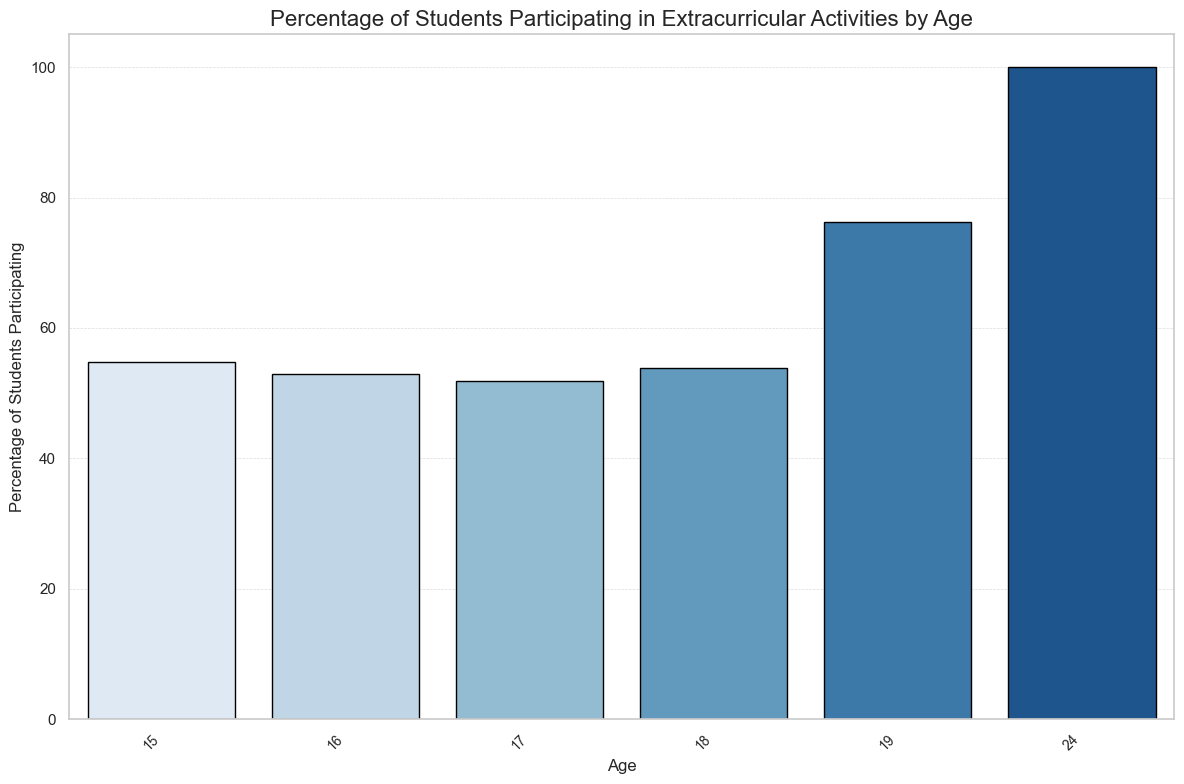

In [12]:
analyze_studytime_by_demographics(df,'location')
analyze_extracurricular_influence(df,'age')

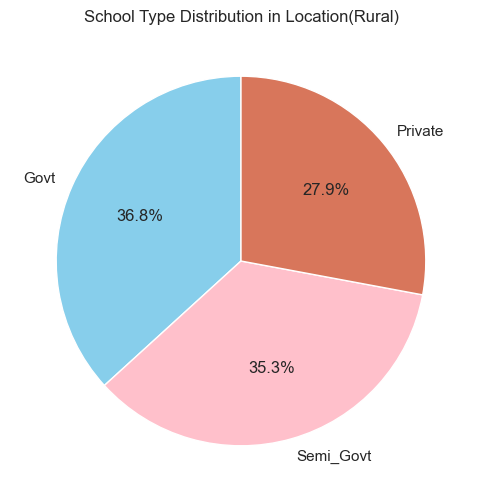

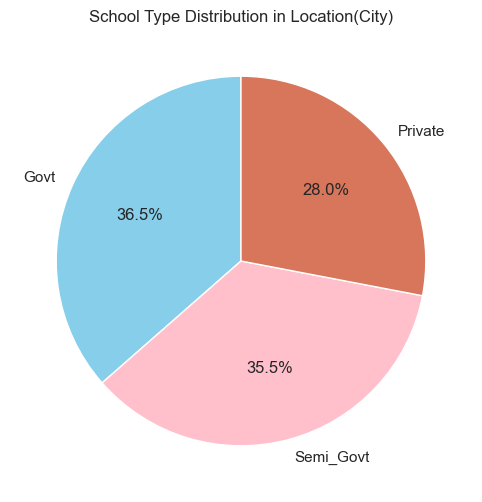

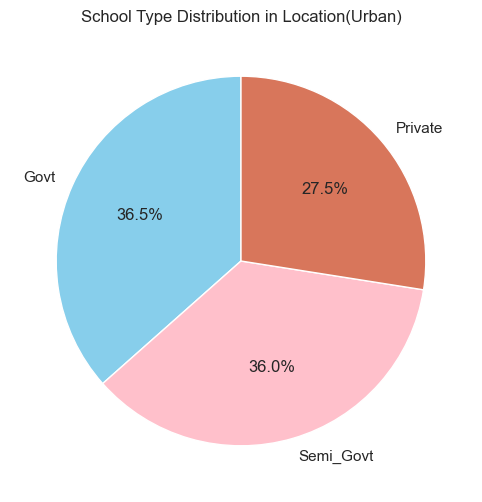

In [13]:

analyze_location_schooltype(df,'rural')
analyze_location_schooltype(df,'city')
analyze_location_schooltype(df,'urban')

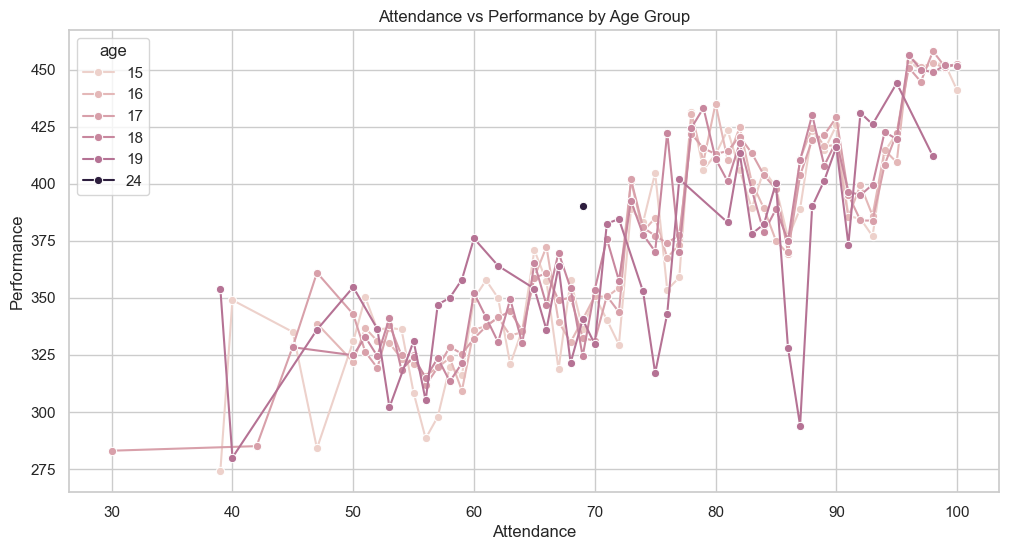

In [14]:
analysis_attendance_vs_performance(df,'age')